In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the cleaned data
data = pd.read_csv("Scraped-data-tayara.tn.csv")

# Drop the 'link' and 'title' columns
#data = data.drop(['link', 'title'], axis=1)

# Display the first few rows to verify
data.head()


,gouvernement,category,num_bedrooms,num_bathrooms,surface_area,transaction_type,date,price
0,"Ariana, Raoued",Terrains et Fermes,NaN,NaN,NaN,NaN,7 février 2020,100.0
1,"Ariana, Autres villes",Terrains et Fermes,NaN,NaN,NaN,NaN,7 février 2020,316000.0
2,"Ariana, Autres villes",Locations de vacances,3.0,80.0,NaN,À Louer,7 février 2020,70.0
3,"Ariana, Autres villes",Appartements,2.0,1.0,900.0,À Louer,7 février 2020,80.0
4,"Ariana, Autres villes",Locations de vacances,1.0,1.0,900.0,À Louer,7 février 2020,70.0


In [2]:
data.columns

Index(['gouvernement', 'category', 'num_bedrooms', 'num_bathrooms',
       'surface_area', 'transaction_type', 'date', 'price'],
      dtype='object')

In [3]:
def printInfo(df):
    print(df.info())
    print(df.describe())
    print(df.head())

def getByCategory(df,category):
    rows = df.category.isin(category)
    return (df[rows],rows)

In [4]:
printInfo(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20137 entries, 0 to 20136
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gouvernement      20137 non-null  object 
 1   category          20137 non-null  object 
 2   num_bedrooms      14100 non-null  float64
 3   num_bathrooms     14100 non-null  float64
 4   surface_area      13187 non-null  float64
 5   transaction_type  14098 non-null  object 
 6   date              20137 non-null  object 
 7   price             20133 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.2+ MB
None
       num_bedrooms  num_bathrooms  surface_area         price
count  1.410000e+04   1.410000e+04  1.318700e+04  2.013300e+04
mean   4.303611e+05   5.686430e+05  1.016187e+06  1.040429e+07
std    2.575147e+07   3.144455e+07  3.983388e+07  8.090750e+08
min   -1.110000e+02  -2.111000e+03 -1.111100e+04  0.000000e+00
25%    2.000000e+00   1.000000e+00  7.300000e+01  

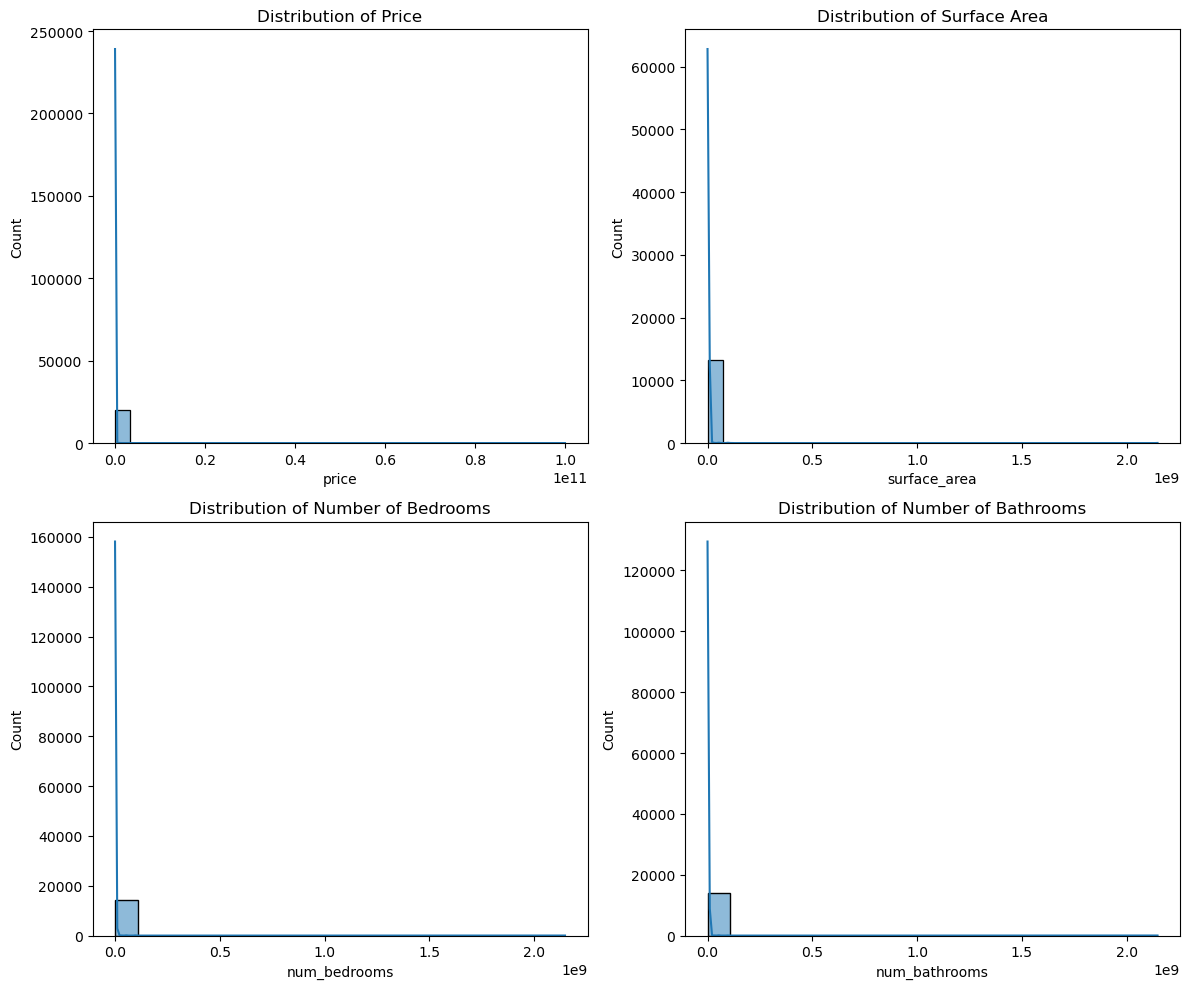

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Price distribution (in the correct unit)
sns.histplot(data['price'], kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Distribution of Price')

# Surface Area distribution
sns.histplot(data['surface_area'], kde=True, ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Distribution of Surface Area')

# Number of Bedrooms distribution
sns.histplot(data['num_bedrooms'], kde=True, ax=axes[1, 0], bins=20)
axes[1, 0].set_title('Distribution of Number of Bedrooms')

# Number of Bathrooms distribution
sns.histplot(data['num_bathrooms'], kde=True, ax=axes[1, 1], bins=20)
axes[1, 1].set_title('Distribution of Number of Bathrooms')

plt.tight_layout()
plt.show()


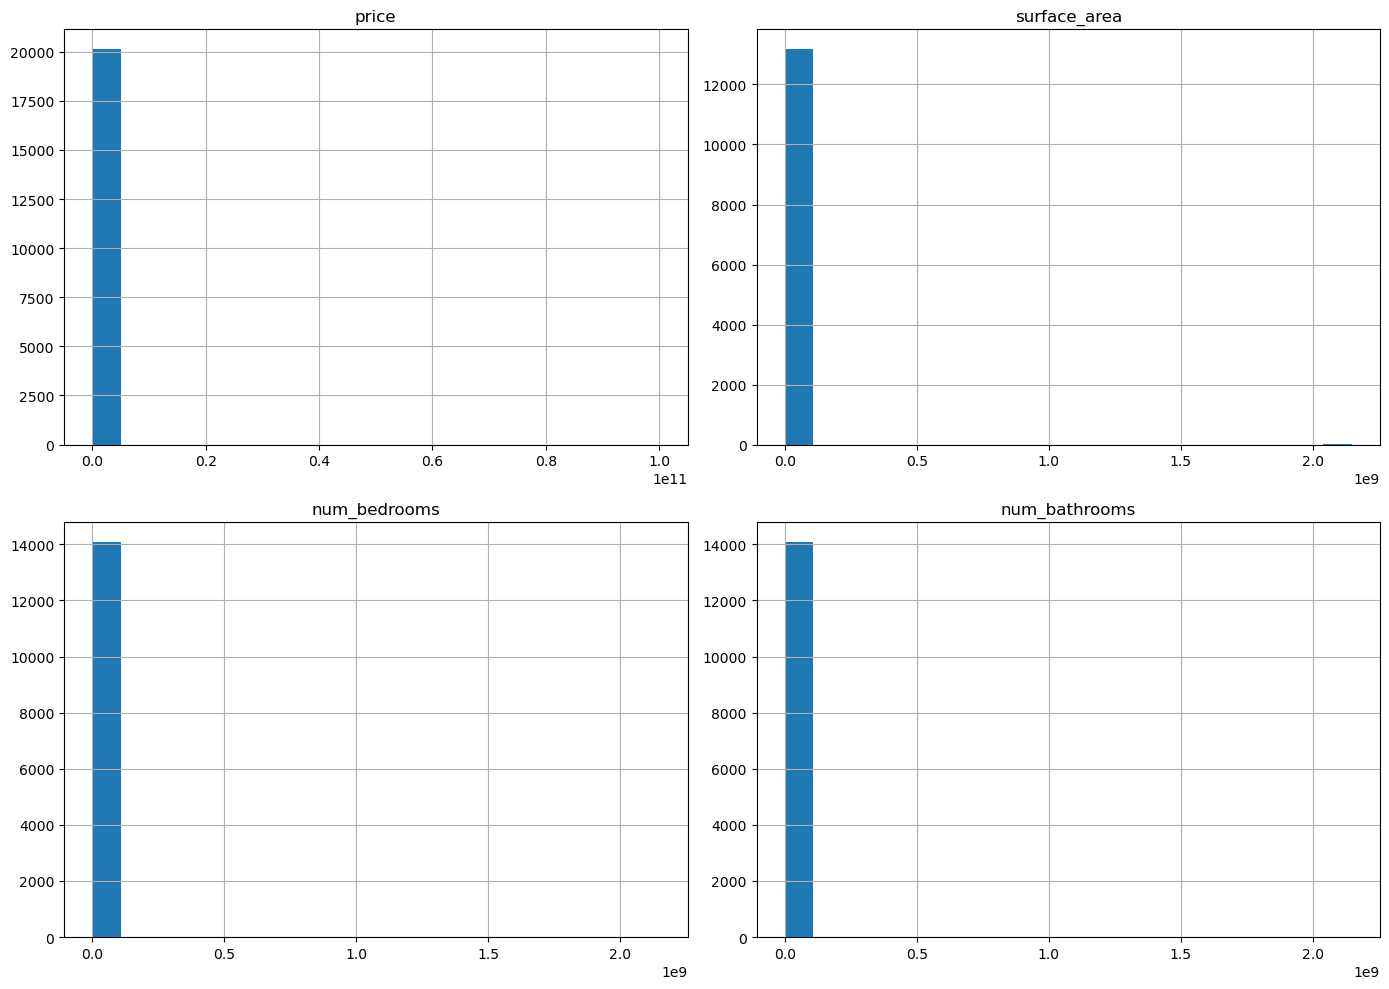

In [6]:
# Plot histograms for relevant features in your dataset
data[['price', 'surface_area', 'num_bedrooms', 'num_bathrooms']].hist(bins=20, figsize=(14, 10))

plt.tight_layout()
plt.show()

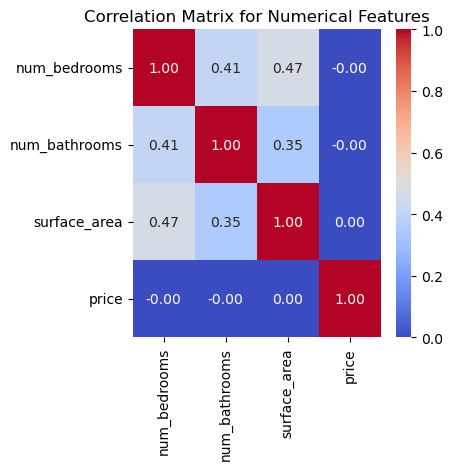

In [7]:
# Feature Selection : Correlation matrix

# Select only the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()



In [8]:
# Show distinct categories in the 'category' column
distinct_categories = data['category'].unique()
print(distinct_categories)


['Terrains et Fermes' 'Locations de vacances' 'Appartements'
 'Magasins, Commerces et Locaux industriels' 'Maisons et Villas'
 'Bureaux et Plateaux' 'Colocations' 'Autre Immobilier']


In [9]:
rows, cats = getByCategory(data, ['Appartements','Locations de vacances','Colocations'])

In [10]:
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 6771 entries, 2 to 20133
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gouvernement      6771 non-null   object 
 1   category          6771 non-null   object 
 2   num_bedrooms      6751 non-null   float64
 3   num_bathrooms     6751 non-null   float64
 4   surface_area      6494 non-null   float64
 5   transaction_type  6749 non-null   object 
 6   date              6771 non-null   object 
 7   price             6768 non-null   float64
dtypes: float64(4), object(4)
memory usage: 476.1+ KB
None
       num_bedrooms  num_bathrooms  surface_area         price
count  6.751000e+03   6.751000e+03  6.494000e+03  6.768000e+03
mean   2.032356e+05   1.715703e+05  5.407338e+05  6.325050e+05
std    3.779753e+06   3.380941e+06  2.694343e+07  1.081339e+07
min   -4.000000e+00  -9.000000e+00 -2.500000e+02  0.000000e+00
25%    2.000000e+00   1.000000e+00  7.000000e+01  1.70

In [11]:
# Define the reasonable ranges for your numeric features
bedrooms = data['num_bedrooms'].between(1, 4)  # Assuming 1 to 4 bedrooms is reasonable
bathrooms = data['num_bathrooms'].between(1, 3)  # Assuming 1 to 3 bathrooms is reasonable
surface_area = data['surface_area'].between(20, 500)  # Assuming reasonable surface area range from 20 to 500 units

# Combine filters with categories
# Assuming 'cats' refers to a filter you may already have based on 'category' or other criteria
dropped = data[cats & ~(bedrooms & bathrooms & surface_area)]  # Drop rows that do not meet the conditions

# Remove the rows that don't satisfy the conditions
data.drop(dropped.index, inplace=True)


In [12]:
rows, cat = getByCategory(data, ['Maisons et Villas'])
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 17 to 20136
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gouvernement      5020 non-null   object 
 1   category          5020 non-null   object 
 2   num_bedrooms      5003 non-null   float64
 3   num_bathrooms     5003 non-null   float64
 4   surface_area      4786 non-null   float64
 5   transaction_type  5002 non-null   object 
 6   date              5020 non-null   object 
 7   price             5019 non-null   float64
dtypes: float64(4), object(4)
memory usage: 353.0+ KB
None
       num_bedrooms  num_bathrooms  surface_area         price
count  5.003000e+03   5.003000e+03  4.786000e+03  5.019000e+03
mean   9.134172e+05   1.325793e+06  1.050431e+06  3.573246e+06
std    4.299557e+07   5.260999e+07  3.804968e+07  6.430572e+07
min   -1.110000e+02  -2.111000e+03 -1.111100e+04  0.000000e+00
25%    3.000000e+00   1.000000e+00  1.012500e+02  6.5

In [13]:
# Define the reasonable ranges for your numeric features
bedrooms = data['num_bedrooms'].between(1, 20)  # Assuming 1 to 4 bedrooms is reasonable
bathrooms = data['num_bathrooms'].between(1, 15)  # Assuming 1 to 3 bathrooms is reasonable
surface_area = data['surface_area'].between(70, 2000)  # Assuming reasonable surface area range from 20 to 500 units

# Combine filters with categories
# Assuming 'cats' refers to a filter you may already have based on 'category' or other criteria
dropped = data[cats & ~(bedrooms & bathrooms & surface_area)]  # Drop rows that do not meet the conditions

# Remove the rows that don't satisfy the conditions
data.drop(dropped.index, inplace=True)


In [14]:
rows, cat = getByCategory(data, ['Terrains et Fermes'])
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 5797 entries, 0 to 20132
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gouvernement      5797 non-null   object 
 1   category          5797 non-null   object 
 2   num_bedrooms      0 non-null      float64
 3   num_bathrooms     0 non-null      float64
 4   surface_area      0 non-null      float64
 5   transaction_type  0 non-null      object 
 6   date              5797 non-null   object 
 7   price             5797 non-null   float64
dtypes: float64(4), object(4)
memory usage: 407.6+ KB
None
       num_bedrooms  num_bathrooms  surface_area         price
count           0.0            0.0           0.0  5.797000e+03
mean            NaN            NaN           NaN  2.208495e+07
std             NaN            NaN           NaN  1.321961e+09
min             NaN            NaN           NaN  0.000000e+00
25%             NaN            NaN           NaN  0.00

In [15]:
# Assuming 'cat' is a boolean mask or a condition based on 'category' or another filter

# Update the 'num_bedrooms', 'num_bathrooms', and 'surface_area' to -1 where 'cat' is True
data.loc[cat, ['num_bedrooms', 'num_bathrooms', 'surface_area']] = -1

# Update the 'transaction_type' to 'À Vendre' where 'cat' is True
data.loc[cat, 'transaction_type'] = 'À Vendre'


In [16]:
rows, cats = getByCategory(data, ['Magasins, Commerces et Locaux industriels','Bureaux et Plateaux'])
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 7 to 20131
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gouvernement      2442 non-null   object 
 1   category          2442 non-null   object 
 2   num_bedrooms      2346 non-null   float64
 3   num_bathrooms     2346 non-null   float64
 4   surface_area      1907 non-null   float64
 5   transaction_type  2347 non-null   object 
 6   date              2442 non-null   object 
 7   price             2442 non-null   float64
dtypes: float64(4), object(4)
memory usage: 171.7+ KB
None
       num_bedrooms  num_bathrooms  surface_area         price
count  2.346000e+03   2.346000e+03  1.907000e+03  2.442000e+03
mean   5.380286e+04   9.661215e+04  2.549329e+06  2.390520e+07
std    1.386735e+06   2.471236e+06  6.976039e+07  1.113262e+09
min   -3.000000e+00  -2.000000e+00 -1.500000e+03  0.000000e+00
25%    1.000000e+00   1.000000e+00  4.000000e+01  0.00

In [17]:
# Define the reasonable ranges for your numeric features
bedrooms = data['num_bedrooms'].between(1, 15)  # Assuming 1 to 4 bedrooms is reasonable
bathrooms = data['num_bathrooms'].between(0, 10)  # Assuming 1 to 3 bathrooms is reasonable
surface_area = data['surface_area'].between(20, 2000)  # Assuming reasonable surface area range from 20 to 500 units

# Combine filters with categories
# Assuming 'cats' refers to a filter you may already have based on 'category' or other criteria
dropped = data[cats & ~(bedrooms & bathrooms & surface_area)]  # Drop rows that do not meet the conditions

# Remove the rows that don't satisfy the conditions
data.drop(dropped.index, inplace=True)


In [18]:
rows, cat = getByCategory(data, ['Autre Immobilier'])
printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 466 to 20095
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gouvernement      107 non-null    object 
 1   category          107 non-null    object 
 2   num_bedrooms      0 non-null      float64
 3   num_bathrooms     0 non-null      float64
 4   surface_area      0 non-null      float64
 5   transaction_type  0 non-null      object 
 6   date              107 non-null    object 
 7   price             107 non-null    float64
dtypes: float64(4), object(4)
memory usage: 7.5+ KB
None
       num_bedrooms  num_bathrooms  surface_area         price
count           0.0            0.0           0.0  1.070000e+02
mean            NaN            NaN           NaN  7.959739e+06
std             NaN            NaN           NaN  7.262881e+07
min             NaN            NaN           NaN  0.000000e+00
25%             NaN            NaN           NaN  0.000

In [19]:
data.drop(rows.index,inplace=True)

In [20]:
data.dropna(subset=['price'],inplace=True)

In [21]:
data.drop(columns=['date'],inplace=True)

In [22]:
# Step 1: Drop rows where the price is less than 10
dropped = data['price'] < 10
data.drop(data[dropped].index, inplace=True)

# Step 2: Create a mask for rows where transaction_type is 'À Vendre'
forSale = data['transaction_type'] == 'À Vendre'

# Step 3: Create a mask for rows where price is below 10,000
below10k = data['price'] < 10000

# Step 4: Multiply price by 1000 for 'À Vendre' rows where price is less than 10,000
data.loc[forSale & below10k, 'price'] *= 1000


In [23]:
data['gouvernement'] = data['gouvernement'].str.strip()
data[['city', 'region']] = data['gouvernement'].str.split(', ', expand=True)
data.drop('gouvernement', axis=1, inplace=True)

In [24]:
#Reducing Skewness and Handling Exponential Growth or Wide Ranges 
data['log_price'] = np.log10(data['price'])

In [25]:
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
category              0
num_bedrooms         13
num_bathrooms        13
surface_area        169
transaction_type     13
price                 0
city                  0
region                0
log_price             0
dtype: int64


In [26]:
# Group by category and calculate the average price
category_price_summary = data.groupby('category')['price'].agg(['mean', 'median', 'min', 'max', 'count'])

# Display the summary
print(category_price_summary)


                                                   mean    median      min  \
category                                                                     
Appartements                               6.326462e+05    1480.0     10.0   
Bureaux et Plateaux                        1.530119e+05    1500.0     45.0   
Colocations                                1.009732e+06     200.0     90.0   
Locations de vacances                      1.196220e+05      75.0     10.0   
Magasins, Commerces et Locaux industriels  8.655776e+07    5000.0     30.0   
Maisons et Villas                          4.718198e+06  140000.0     11.0   
Terrains et Fermes                         3.766203e+07  170000.0  10000.0   

                                                    max  count  
category                                                        
Appartements                               3.500000e+08   3933  
Bureaux et Plateaux                        2.209222e+07    461  
Colocations                          

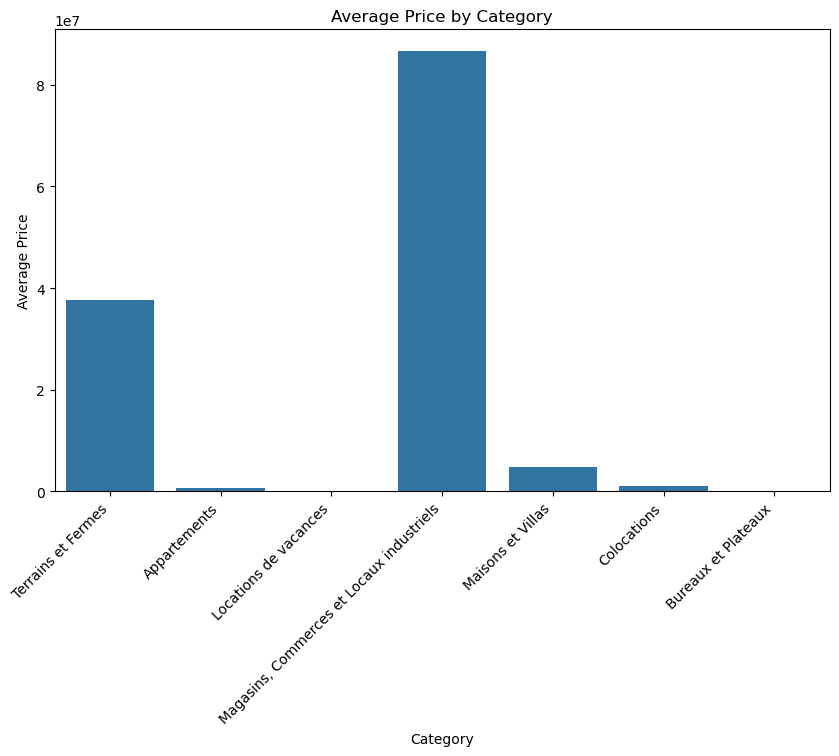

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the average price by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='price', data=data, estimator=np.mean, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Category')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.show()


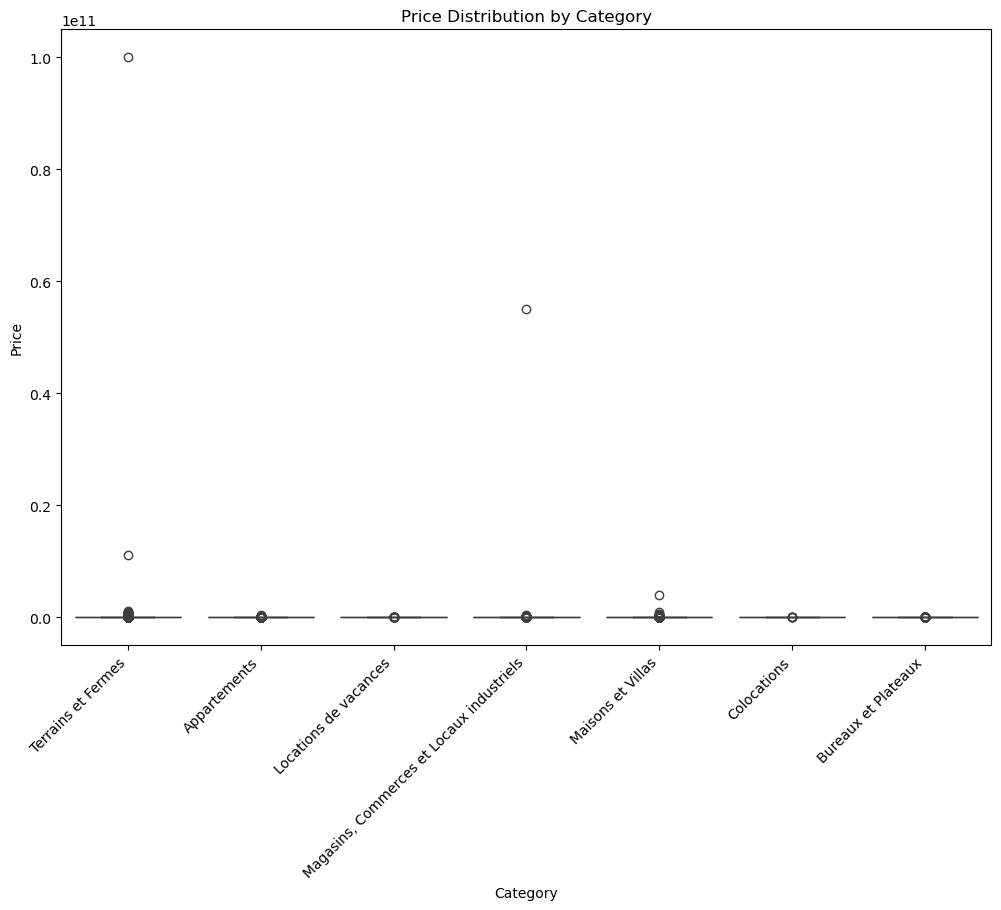

In [28]:
# Box plot to show price distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Category')
plt.ylabel('Price')
plt.xlabel('Category')
plt.show()


In [29]:
# Define price ranges based on your data distribution
low_price = data['price'] < 1000
mid_price = (data['price'] >= 1000) & (data['price'] < 100000)
high_price = data['price'] >= 100000

# Handle missing values for each price range

# Low price range
data.loc[low_price, 'num_bedrooms'] = data.loc[low_price, 'num_bedrooms'].fillna(data.loc[low_price, 'num_bedrooms'].median())
data.loc[low_price, 'num_bathrooms'] = data.loc[low_price, 'num_bathrooms'].fillna(data.loc[low_price, 'num_bathrooms'].median())
data.loc[low_price, 'surface_area'] = data.loc[low_price, 'surface_area'].fillna(data.loc[low_price, 'surface_area'].median())
data.loc[low_price, 'transaction_type'] = data.loc[low_price, 'transaction_type'].fillna(data.loc[low_price, 'transaction_type'].mode()[0])

# Mid price range
data.loc[mid_price, 'num_bedrooms'] = data.loc[mid_price, 'num_bedrooms'].fillna(data.loc[mid_price, 'num_bedrooms'].median())
data.loc[mid_price, 'num_bathrooms'] = data.loc[mid_price, 'num_bathrooms'].fillna(data.loc[mid_price, 'num_bathrooms'].median())
data.loc[mid_price, 'surface_area'] = data.loc[mid_price, 'surface_area'].fillna(data.loc[mid_price, 'surface_area'].median())
data.loc[mid_price, 'transaction_type'] = data.loc[mid_price, 'transaction_type'].fillna(data.loc[mid_price, 'transaction_type'].mode()[0])

# High price range
data.loc[high_price, 'num_bedrooms'] = data.loc[high_price, 'num_bedrooms'].fillna(data.loc[high_price, 'num_bedrooms'].median())
data.loc[high_price, 'num_bathrooms'] = data.loc[high_price, 'num_bathrooms'].fillna(data.loc[high_price, 'num_bathrooms'].median())
data.loc[high_price, 'surface_area'] = data.loc[high_price, 'surface_area'].fillna(data.loc[high_price, 'surface_area'].median())
data.loc[high_price, 'transaction_type'] = data.loc[high_price, 'transaction_type'].fillna(data.loc[high_price, 'transaction_type'].mode()[0])


In [30]:
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
category            0
num_bedrooms        0
num_bathrooms       0
surface_area        0
transaction_type    0
price               0
city                0
region              0
log_price           0
dtype: int64


In [31]:
data

,category,num_bedrooms,num_bathrooms,surface_area,transaction_type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
5,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
6,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
8,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
20132,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
20133,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
20134,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
20135,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [32]:
data.columns

Index(['category', 'num_bedrooms', 'num_bathrooms', 'surface_area',
       'transaction_type', 'price', 'city', 'region', 'log_price'],
      dtype='object')

In [33]:
data.to_csv("Clean_data.csv", index=False)